In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

In [11]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

wine_data = pd.concat([red_wine, white_wine], ignore_index=True)
wine_data['wine_type'] = wine_data['wine_type'].map({'red': 0, 'white': 1})

print("Wine Data: ",wine_data['quality'].value_counts().sort_index())

wine_data.head()


Wine Data:  quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [12]:
#wine_data_clean = wine_data.drop(columns=["fixed acidity", "free sulfur dioxide", "total sulfur dioxide"])
wine_data_clean = wine_data
wine_data_clean.head()
X = wine_data_clean.drop('quality', axis=1)
y = wine_data_clean['quality']

wine_data_clean.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



                 Feature  Importance
10               alcohol    0.254585
1       volatile acidity    0.127507
5    free sulfur dioxide    0.089717
9              sulphates    0.078344
6   total sulfur dioxide    0.071939
3         residual sugar    0.070934
8                     pH    0.068788
4              chlorides    0.064446
7                density    0.058684
2            citric acid    0.058301
0          fixed acidity    0.055866
11             wine_type    0.000888


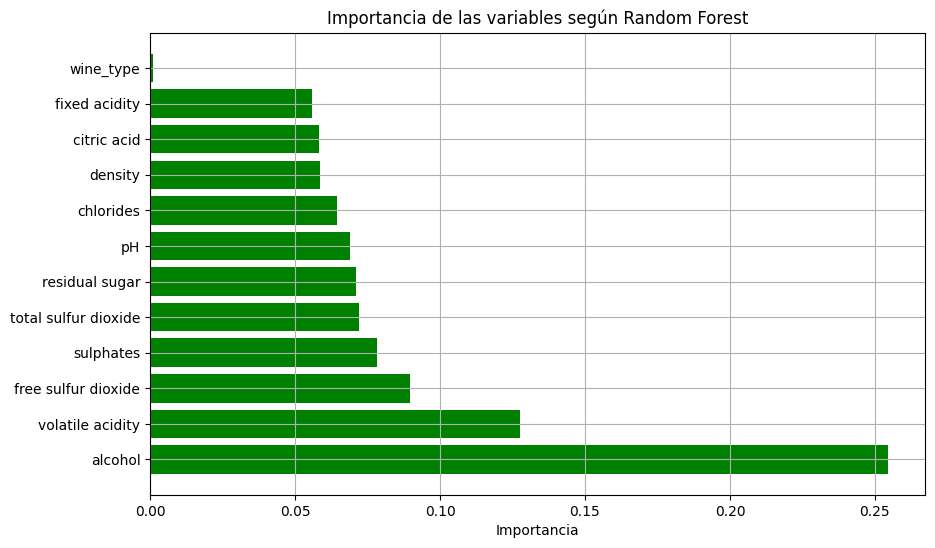

In [15]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

importances = rf.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


print(feature_importance_df)

# Gráfico
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='green')
plt.xlabel('Importancia')
plt.title('Importancia de las variables según Random Forest')
plt.grid()
plt.show()

MSE: 0.3706330769230769
R2 Score: 0.49815894640362013


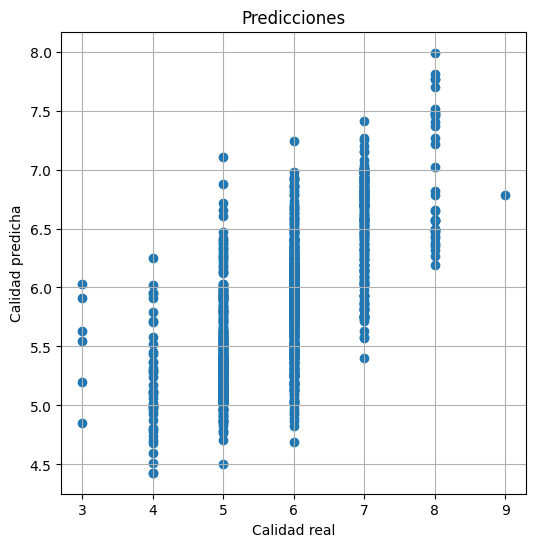

In [19]:

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Gráfico de predicción
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=1)
plt.xlabel("Calidad real")
plt.ylabel("Calidad predicha")
plt.title("Predicciones")
plt.grid()
plt.show()
